**Set environment**

In [19]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(source("../config/config_func.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data files: coverage**

In [2]:
fdiry  = file.path(
    FD_RES, 
    "results"
)
for(fname in dir(fdiry)){print(fname)}

[1] "A001_K562_WSTARRseq"
[1] "comparison"
[1] "CRISPRi_FlowFISH"
[1] "CRISPRi_Growth_K562_Gersbach"
[1] "hic_intact_K562_deep"
[1] "hic_intact_K562_ENCSR479XDG"
[1] "KS91_K562_ASTARRseq"
[1] "LentiMPRA_K562_Nadav"
[1] "region"
[1] "Tewhey_K562_TileMPRA"


## Get effect sizes

In [29]:
### set file paths
fdiry  = file.path(
    FD_RES, 
    "results",
    "region",
    "KS91_K562_ASTARRseq_peak_macs_input",
    "summary"
)
fname = paste("peak", "screened", "fcc", "total", "tsv", sep = ".")
fpath = file.path(fdiry, fname)

### Read table
dat = read_tsv(fpath, show_col_types = FALSE)

### assign and show
dat_peak_screened_total = dat
print(dim(dat))
print(table(dat$Assay_Type))
head(dat)

[1] 732434      7

               ASTARR        CRISPRi-Growth         CRISPRi-HCRFF 
               246850                 80288                  1330 
 ENCODE-E2G_Benchmark ENCODE-E2G_Prediction                 LMPRA 
                 3007                 84129                 68420 
                TMPRA                WSTARR 
                 1722                246688 


Chrom,Start,End,Peak,Score,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr1,100006256,100006880,chr1:100006256-100006880,-0.01311792,ASTARR,ASTARR_T
chr1,100010437,100010915,chr1:100010437-100010915,-0.80687947,ASTARR,ASTARR_T
chr1,10002087,10003910,chr1:10002087-10003910,-0.34892859,ASTARR,ASTARR_T
chr1,100021298,100021629,chr1:100021298-100021629,-1.03799571,ASTARR,ASTARR_T
chr1,100023727,100023976,chr1:100023727-100023976,-0.19100207,ASTARR,ASTARR_T
chr1,100027983,100029702,chr1:100027983-100029702,-0.18001582,ASTARR,ASTARR_T


**Check results**

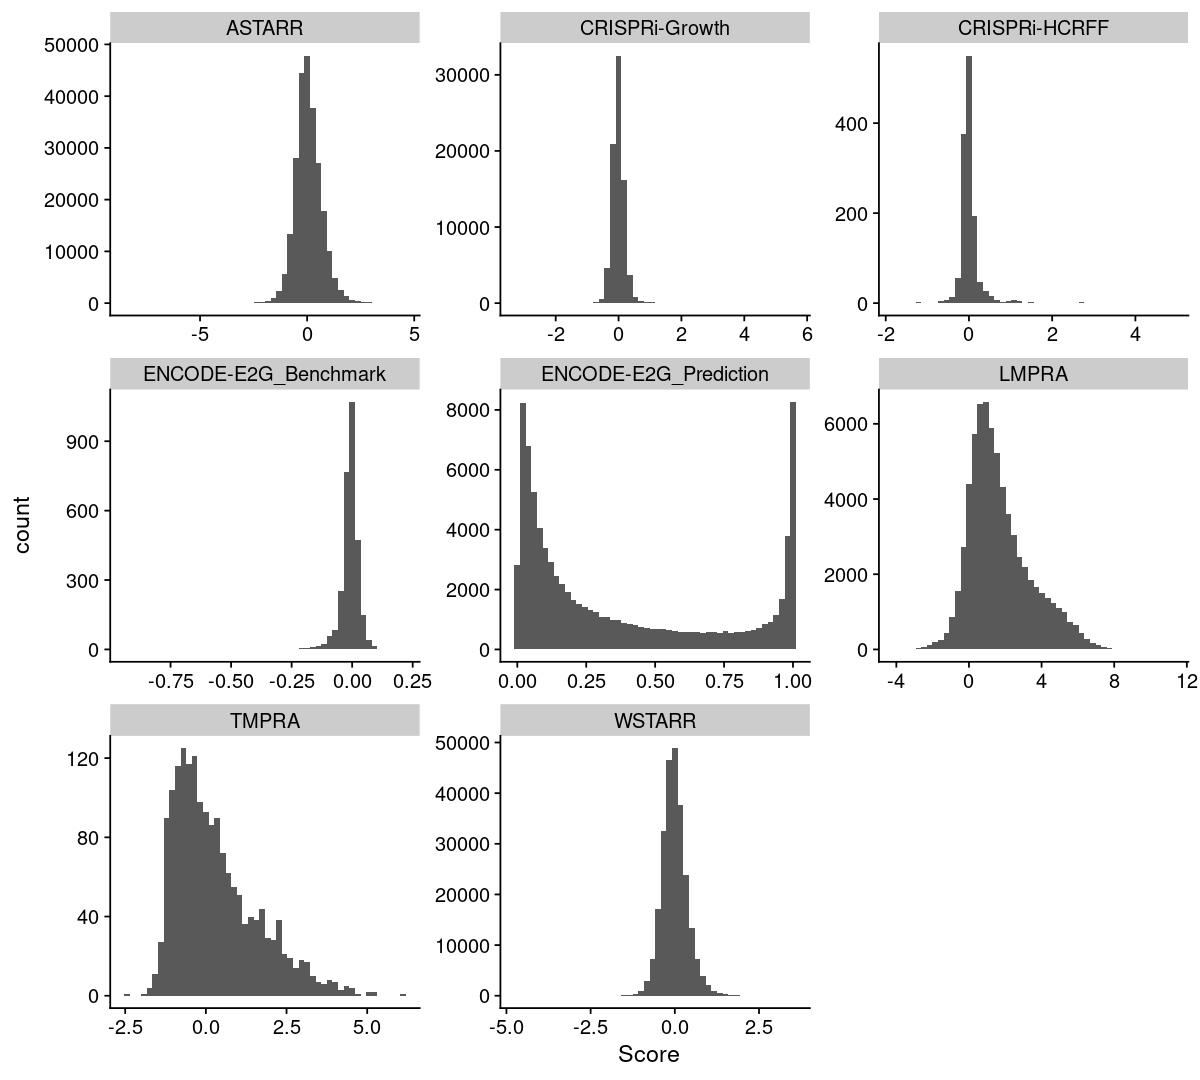

In [9]:
dat = dat_peak_screened_total
gpt = ggplot(dat, aes(x=Score)) +
    geom_histogram(bins = 50) +
    theme_cowplot() +
    facet_wrap(~Assay_Type, scales = "free")

options(repr.plot.width=10, repr.plot.height=9)
print(gpt)

## Get inactive ATAC

In [30]:
### set file paths
fdiry  = file.path(
    FD_RES, 
    "results",
    "region",
    "KS91_K562_ASTARRseq_peak_macs_input",
    "summary"
)
fname = paste("peak", "screened", "fcc", "inactive", "tsv", sep = ".")
fpath = file.path(fdiry, fname)

### Read table
dat = read_tsv(fpath, show_col_types = FALSE)

### assign and show
dat_peak_screened_inactive = dat
print(dim(dat))
print(table(dat$Assay_Type))
head(dat)

[1] 600872      6

               ASTARR        CRISPRi-Growth         CRISPRi-HCRFF 
               228970                 75409                  1272 
 ENCODE-E2G_Benchmark ENCODE-E2G_Prediction                 LMPRA 
                 2652                 48374                 35087 
                TMPRA                WSTARR 
                  473                208635 


Chrom,Start,End,Peak,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10015,10442,chr1:10015-10442,ASTARR,ASTARR_I
chr1,14253,14645,chr1:14253-14645,ASTARR,ASTARR_I
chr1,16015,16477,chr1:16015-16477,ASTARR,ASTARR_I
chr1,17237,17772,chr1:17237-17772,ASTARR,ASTARR_I
chr1,28903,29613,chr1:28903-29613,ASTARR,ASTARR_I
chr1,30803,31072,chr1:30803-31072,ASTARR,ASTARR_I


## Filter

In [31]:
dat = dat_peak_screened_total
head(dat)

Chrom,Start,End,Peak,Score,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr1,100006256,100006880,chr1:100006256-100006880,-0.01311792,ASTARR,ASTARR_T
chr1,100010437,100010915,chr1:100010437-100010915,-0.80687947,ASTARR,ASTARR_T
chr1,10002087,10003910,chr1:10002087-10003910,-0.34892859,ASTARR,ASTARR_T
chr1,100021298,100021629,chr1:100021298-100021629,-1.03799571,ASTARR,ASTARR_T
chr1,100023727,100023976,chr1:100023727-100023976,-0.19100207,ASTARR,ASTARR_T
chr1,100027983,100029702,chr1:100027983-100029702,-0.18001582,ASTARR,ASTARR_T


In [43]:
dat = dat_peak_screened_total
dat = dat %>% 
    dplyr::group_by(Assay_Type) %>%
    dplyr::summarise(
        Score_Mu = mean(Score),
        Score_SD = sd(Score),
        .groups = "drop"
    ) %>%
    dplyr::mutate(
        Score_Up = Score_Mu + Score_SD,
        Score_Lw = Score_Mu - Score_SD)

dat_peak_screened_summary = dat
print(dim(dat))
head(dat)

[1] 8 5


Assay_Type,Score_Mu,Score_SD,Score_Up,Score_Lw
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ASTARR,0.0589208048,0.62944413,0.68836493,-0.57052332
CRISPRi-Growth,0.0006558736,0.24228597,0.24294185,-0.24163010
CRISPRi-HCRFF,0.0155558929,0.31164789,0.32720378,-0.29609200
ENCODE-E2G_Benchmark,-0.0133548205,0.06079169,0.04743687,-0.07414651
ENCODE-E2G_Prediction,0.3828060727,0.36624211,0.74904818,0.01656396
LMPRA,1.6950502336,1.71266963,3.40771987,-0.01761940


In [44]:
vec_txt_assay = c(
    "ASTARR", "WSTARR", "TMPRA", "LMPRA", 
    "CRISPRi-HCRFF",
    "CRISPRi-Growth",
    "ENCODE-E2G_Benchmark"
)

dat = dplyr::left_join(
    dat_peak_screened_total,
    dat_peak_screened_summary,
    by = "Assay_Type")
dat = dat %>% 
    dplyr::filter(Assay_Type %in% vec_txt_assay) %>%
    dplyr::filter(
        Score < Score_Up,
        Score > Score_Lw
    ) %>%
    dplyr::select(Peak, Assay_Type)

### assign and show
dat_peak_screened_total_filter = dat
print(dim(dat))
head(dat)

[1] 480460      2


Peak,Assay_Type
<chr>,<chr>
chr1:100006256-100006880,ASTARR
chr1:10002087-10003910,ASTARR
chr1:100023727-100023976,ASTARR
chr1:100027983-100029702,ASTARR
chr1:100044617-100044899,ASTARR
chr1:100049562-100050540,ASTARR


In [45]:
head(dat_peak_screened_inactive)

Chrom,Start,End,Peak,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10015,10442,chr1:10015-10442,ASTARR,ASTARR_I
chr1,14253,14645,chr1:14253-14645,ASTARR,ASTARR_I
chr1,16015,16477,chr1:16015-16477,ASTARR,ASTARR_I
chr1,17237,17772,chr1:17237-17772,ASTARR,ASTARR_I
chr1,28903,29613,chr1:28903-29613,ASTARR,ASTARR_I
chr1,30803,31072,chr1:30803-31072,ASTARR,ASTARR_I


In [46]:
head(dat_peak_screened_total_filter)

Peak,Assay_Type
<chr>,<chr>
chr1:100006256-100006880,ASTARR
chr1:10002087-10003910,ASTARR
chr1:100023727-100023976,ASTARR
chr1:100027983-100029702,ASTARR
chr1:100044617-100044899,ASTARR
chr1:100049562-100050540,ASTARR


In [49]:
### merge to filter the inactive peaks
dat = dplyr::inner_join(
    dat_peak_screened_total_filter,
    dat_peak_screened_inactive,
    by = c("Peak", "Assay_Type"))

### arrange column order
dat = dat %>% dplyr::select(Chrom, Start, End, Peak, Assay_Type, Assay_Label)

### assign and show
dat_peak_screened_inactive_filter = dat
print(dim(dat))
head(dat)

[1] 435431      6


Chrom,Start,End,Peak,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,100006256,100006880,chr1:100006256-100006880,ASTARR,ASTARR_I
chr1,10002087,10003910,chr1:10002087-10003910,ASTARR,ASTARR_I
chr1,100023727,100023976,chr1:100023727-100023976,ASTARR,ASTARR_I
chr1,100027983,100029702,chr1:100027983-100029702,ASTARR,ASTARR_I
chr1,100044617,100044899,chr1:100044617-100044899,ASTARR,ASTARR_I
chr1,100049562,100050540,chr1:100049562-100050540,ASTARR,ASTARR_I


In [50]:
dat = dat_peak_screened_inactive
print(dim(dat))
print(table(dat$Assay_Type))

dat = dat_peak_screened_inactive_filter
print(dim(dat))
print(table(dat$Assay_Type))

[1] 600872      6

               ASTARR        CRISPRi-Growth         CRISPRi-HCRFF 
               228970                 75409                  1272 
 ENCODE-E2G_Benchmark ENCODE-E2G_Prediction                 LMPRA 
                 2652                 48374                 35087 
                TMPRA                WSTARR 
                  473                208635 
[1] 435431      6

              ASTARR       CRISPRi-Growth        CRISPRi-HCRFF 
              173373                64246                 1198 
ENCODE-E2G_Benchmark                LMPRA                TMPRA 
                2524                28068                  299 
              WSTARR 
              165723 


## Save results

In [51]:
### set file paths
fdiry  = file.path(
    FD_RES, 
    "results",
    "region",
    "KS91_K562_ASTARRseq_peak_macs_input",
    "summary"
)
fname = paste("peak", "screened", "fcc", "inactive", "filter", "tsv", sep = ".")
fpath = file.path(fdiry, fname)

### Write table
dat = dat_peak_screened_inactive_filter
write_tsv(dat, fpath)